In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [60]:
# set the dimensions
N = 100
D = 2
M = 4
K = 3

In [61]:
# set the initial weights
# np.random.seed(1234)
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [62]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(2, 4)
(4,)
(4, 3)
(3,)


In [63]:
print(W1)
print()
print(b1)

[[ 2.07394583 -0.09839348  0.43811088  1.14706488]
 [ 0.87551437  1.9246731  -0.22744765  0.58334861]]

[-0.14101262 -1.76571508  0.96020213 -1.0573882 ]


In [64]:
print(W2)
print()
print(b2)

[[ 1.63207233 -1.04087209 -0.87127164]
 [-1.19594236 -0.94797405 -0.34267317]
 [-0.35590583  1.15603368  0.76223269]
 [-0.53995729 -1.27245464  1.09381318]]

[ 0.79408433 -0.35811502 -0.2841488 ]


In [69]:
# X, t = make_classification(n_samples=N, n_features=D, n_classes=K, n_redundant=0, 
#                            n_informative=D, n_clusters_per_class=1)
X, t = make_blobs(n_features=2, centers=3)

In [70]:
print(X.shape)
print(t.shape)

(100, 2)
(100,)


In [71]:
X1 = pd.DataFrame(X, columns=['f1', 'f2'])
t1 = pd.DataFrame(t, columns=['target'])
df = pd.concat([X1, t1], axis=1)

## Graph

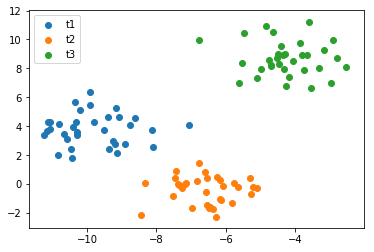

In [72]:
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.scatter(df.loc[df['target']==2, 'f1'], df.loc[df['target']==2, 'f2'],
            label = 't3')
plt.legend()
plt.show()

## Log reg

In [73]:
def Z(X, W, b):
    return np.dot(X, W) + b

In [74]:
def sig(Z):
    return 1/(1+np.exp(-Z))

In [75]:
def soft(Z):
    exp_Z = np.exp(Z)
    return exp_Z/np.sum(exp_Z, axis=1, keepdims=True)

In [76]:
Z1 = Z(X, W1, b1)
Z1.shape

(100, 4)

In [77]:
y1 = sig(Z1)
y1.shape

(100, 4)

In [78]:
Z2 = Z(y1, W2, b2)
Z2.shape

(100, 3)

In [79]:
y2 = soft(Z2)
y2.shape

(100, 3)

In [80]:
def ohe(t):
    result = np.zeros((N,K))
    for i in range(len(t)):
        result[i, t[i]] = 1
    return result

In [81]:
def cost(t, y):
    return -t*np.log(y)

In [82]:
cost1 = cost(ohe(t), y2)
cost1.shape

(100, 3)

In [83]:
def error(cost):
    return (cost.sum())/N

In [84]:
err0 = error(cost1)
err0

1.1084351843942966

In [85]:
def accuracy(t, y):
    return (t==np.round(y)).mean()

In [86]:
acc0 = accuracy(ohe(t), y2)
acc0

0.52

In [87]:
err_reg = [err0]
acc_reg = [acc0]

In [88]:
lr = 0.001
cache_W1 = 0
cache_b1 = 0
cache_W2 = 0
cache_b2 = 0
decay = 0.99
eps = 10e-8

print('initial error: {}'.format(err0))

initial error: 1.1084351843942966


In [89]:
for e in range(15000):

    Z1 = Z(X, W1, b1)
    y1 = sig(Z1)
    Z2 = Z(y1, W2, b2)
    y2 = soft(Z2)
    cost1 = cost(ohe(t), y2)
    error1 = error(cost1)
    
    dZ2 = (ohe(t) - y2)
    dw2 = np.dot(y1.T, dZ2)
    db2 = (dZ2.sum(axis=0))
    cache_W2 = decay*cache_W2 + (1-decay)*dw2*dw2
    cache_b2 = decay*cache_b2 + (1-decay)*db2*db2
    
    dZ1 = np.dot(dZ2, W2.T)*(y1*(1-y1))
    dw1 = np.dot(X.T, dZ1)
    db1 = (dZ1.sum(axis=0))
    cache_W1 = decay*cache_W1 + (1-decay)*dw1*dw1
    cache_b1 = decay*cache_b1 + (1-decay)*db1*db1
    
    W2 += (lr*dw2)/(np.sqrt(cache_W2 + eps))
    b2 += (lr*db2)/(np.sqrt(cache_b2 + eps))
    W1 += (lr*dw1)/(np.sqrt(cache_W1 + eps))
    b1 += (lr*db1) /(np.sqrt(cache_b1 + eps))   
    
    if e % 100 == 0:
        err_reg.append(error1)
        acc_reg.append(accuracy(ohe(t), y2))
        print('error:{}'.format(error1))

error:1.1084351843942966
error:0.6880694231456559
error:0.5521938758622398
error:0.4726685660741265
error:0.41304078931924665
error:0.35913526623803077
error:0.3125842953196966
error:0.2734962491710765
error:0.24005519138821477
error:0.21122882054686787
error:0.18633022661770832
error:0.1647962692021741
error:0.1461378216757888
error:0.1299348801231036
error:0.11581968254477794
error:0.10349297499025459
error:0.0926936750497903
error:0.08320305828959398
error:0.07483565877570542
error:0.06743339917152076
error:0.06085985341929316
error:0.05499497052120605
error:0.04973630626124631
error:0.045005849358267375
error:0.0407433972065102
error:0.036897201971699496
error:0.033421649168596634
error:0.030276668129267294
error:0.02742715474696933
error:0.02484259424016596
error:0.02249702534345925
error:0.020368614950071563
error:0.018438315801485517
error:0.01668871395489189
error:0.015103644864072598
error:0.013668155121541223
error:0.012368503046311272
error:0.011192124403033814
error:0.01012

In [90]:
accuracy(ohe(t), y2)

1.0

## Graph

### Constant learning rate

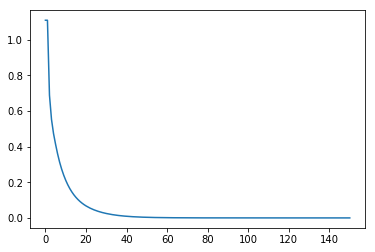

In [91]:
plt.plot(err_reg)
plt.show()

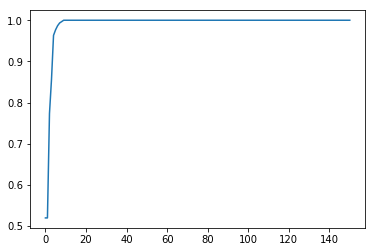

In [92]:
plt.plot(acc_reg)
plt.show()

# test

In [14]:
lr1 = [0.1]

In [15]:
for i in range(100):
    k = 0.1
    lr1.append(lr1[0]*np.exp(- k * i))

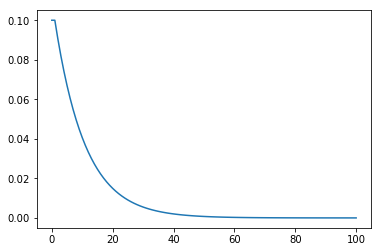

In [16]:
plt.plot(lr)
plt.show()

In [17]:
lr2 = [0.1]

In [18]:
for i in range(100):
    k = 0.1
    lr2.append(lr2[0]/((k * i) + 1))

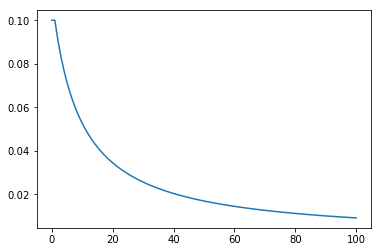

In [19]:
plt.plot(lr2)
plt.show()

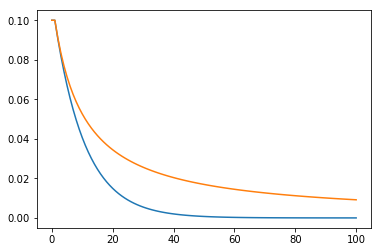

In [20]:
plt.plot(lr1)
plt.plot(lr2)
plt.show()

In [93]:
cache_W1

array([[3.22051323e-19, 6.51607985e-13, 6.65269537e-12, 7.48713551e-15],
       [2.69011250e-18, 6.54932293e-11, 6.26667734e-14, 1.60739986e-15]])